In [23]:
%matplotlib notebook
import math
import matplotlib.pyplot as plt
import pylab
from pylab import rcParams
import ipywidgets as widgets
import numpy as np
from scipy.interpolate import griddata

rcParams['figure.figsize'] = 8,2
plt.close("all")

In [24]:
#This function calculates the trajectory "t" using projectile motion

def calc_trajectory(xx, theta, v, g):
    
    t = np.zeros((len(xx)))
    for kk in range(len(xx)):
        t[kk] =math.tan(theta)*(xx[kk]) - (g*(xx[kk])**2)/(2*v*v*math.cos(theta)*math.cos(theta))

    return(t)

In [25]:
def move_robot(xx, x0, traj, y0):
    xnew = np.zeros((len(xx)))
    tnew = np.zeros((len(xx)))
    
    for kk in range(len(xx)):
        xnew[kk] = xx[kk] + x0
        tnew[kk] = traj[kk] + y0
    return xnew, tnew

In [26]:
x0 =2
y0 = 2
xx = np.linspace(0, 10, num=100)
v = 10
g = 9.81
theta = 45*math.pi/180
y = calc_trajectory(xx, theta, v, g)
xnew, ynew = move_robot(xx, x0, y, y0)

<IPython.core.display.Javascript object>


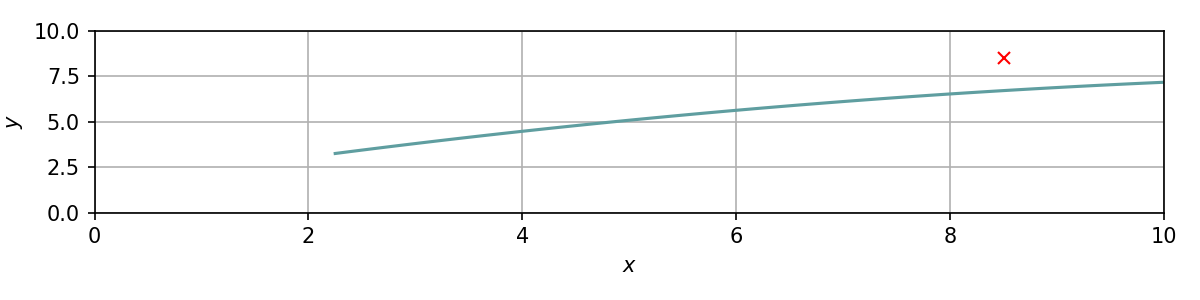

interactive(children=(IntSlider(value=42, description='theta', max=85), FloatSlider(value=10.0, description='v…

In [27]:

######################### Plot initial Figure ##################################################
fig = plt.figure(1)

#plot 
ax1 = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=4)
Traj = ax1.plot(xnew,ynew,color = 'cadetblue')
ax1.plot(8.5,8.5,'rx')
plt.grid(which='minor')
plt.grid(which='major')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
ax1.set_ylim([0,10])
ax1.set_xlim([0,10])

plt.tight_layout()


def f1(theta, v, x0, y0):
    
    y = calc_trajectory(xx, theta*math.pi/180, v, g)
    xnew, ynew = move_robot(xx, x0, y, y0)
    Traj[0].set_xdata([xnew])
    Traj[0].set_ydata([ynew])

    plt.show()    
w1 = widgets.interact(f1, theta =(0, 85, 1), v =(0, 20, 0.5), x0 =(0, 5, 0.25), y0 =(0, 5, 0.25))
